In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jaswa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jaswa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_csv(r"C:\Users\jaswa\Downloads\complaints.csv\complaints.csv")

df1 = df[['Product', 'Consumer complaint narrative']].copy()
df1 = df1[pd.notnull(df1['Consumer complaint narrative'])]

In [3]:
df1.columns = ['Product', 'Consumer_complaint']
print("Original data shape:", df1.shape)

Original data shape: (3322175, 2)


In [4]:
df2 = df1.sample(10000, random_state=1).copy()

In [5]:
df2.replace({'Product': {
    'Credit reporting, credit repair services, or other personal consumer reports': 'Credit reporting, repair, or other',
    'Credit reporting': 'Credit reporting, repair, or other',}}, inplace=True)

In [6]:
df2['category_id'] = df2['Product'].factorize()[0]
category_id_df = df2[['Product', 'category_id']].drop_duplicates()

In [7]:
target_categories = {
    'Credit reporting, repair, or other': 0,
    'Debt collection': 1,
    'Consumer Loan': 2,
    'Mortgage': 3
}

df_final = df2[df2['Product'].isin(target_categories.keys())].copy()
df_final['label'] = df_final['Product'].map(target_categories)

print("Filtered dataset shape:", df_final.shape)
print(df_final['Product'].value_counts())

Filtered dataset shape: (4021, 4)
Product
Credit reporting, repair, or other    2516
Debt collection                       1105
Mortgage                               374
Consumer Loan                           26
Name: count, dtype: int64


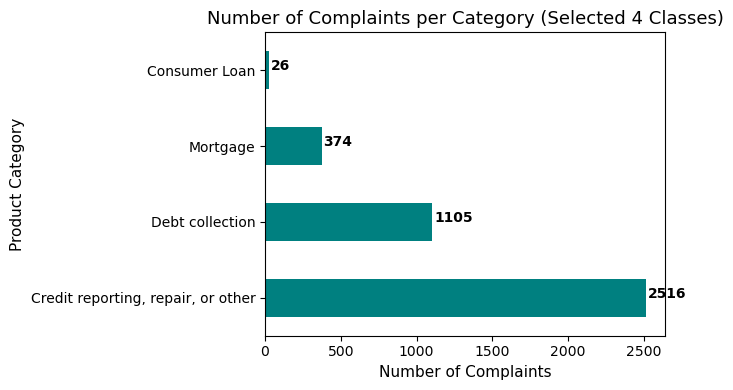

In [8]:
plt.figure(figsize=(7,4))
class_counts = df_final['Product'].value_counts()
class_counts.plot(kind='barh', color='teal')

plt.title('Number of Complaints per Category (Selected 4 Classes)', fontsize=13)
plt.xlabel('Number of Complaints', fontsize=11)
plt.ylabel('Product Category', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for i, v in enumerate(class_counts):
    plt.text(v + 10, i, str(v), color='black', fontweight='bold')
plt.tight_layout()
plt.show()

In [11]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'\W+', ' ', text.lower())
    
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

df_final['clean_text'] = df_final['Consumer_complaint'].apply(preprocess)

In [12]:
X = df_final['clean_text']
y = df_final['label']

vectorizer = TfidfVectorizer(max_features=3000)
X_tfidf = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [13]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'SVM (Linear)': LinearSVC()
}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, preds))


Training Logistic Regression...
Accuracy: 0.8957
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       533
           1       0.89      0.75      0.81       203
           2       0.00      0.00      0.00         3
           3       0.93      0.79      0.85        66

    accuracy                           0.90       805
   macro avg       0.68      0.63      0.65       805
weighted avg       0.89      0.90      0.89       805


Training Naive Bayes...
Accuracy: 0.8621
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       533
           1       0.90      0.58      0.71       203
           2       0.00      0.00      0.00         3
           3       0.98      0.76      0.85        66

    accuracy                           0.86       805
   macro avg       0.68      0.58      0.62       805
weighted avg       0.87      0.86      0.85  

C:\Users\jaswa\anaconda34\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jaswa\anaconda34\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jaswa\anaconda34\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jaswa\anaconda34\Lib\site-pa

Accuracy: 0.8894
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       533
           1       0.85      0.75      0.80       203
           2       0.00      0.00      0.00         3
           3       0.89      0.83      0.86        66

    accuracy                           0.89       805
   macro avg       0.66      0.63      0.65       805
weighted avg       0.88      0.89      0.89       805



C:\Users\jaswa\anaconda34\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jaswa\anaconda34\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jaswa\anaconda34\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
model_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    model_scores[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.8957
Naive Bayes Accuracy: 0.8621
SVM (Linear) Accuracy: 0.8894


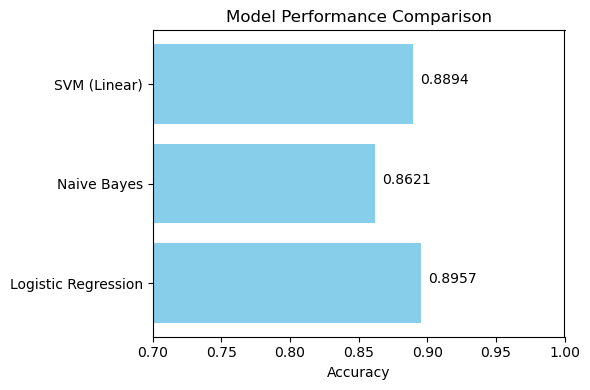

In [15]:
# Plot comparison
plt.figure(figsize=(6,4))
plt.barh(list(model_scores.keys()), list(model_scores.values()), color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model Performance Comparison")
plt.xlim(0.7, 1.0)
for index, value in enumerate(model_scores.values()):
    plt.text(value + 0.005, index, f"{value:.4f}")
plt.tight_layout()
plt.show()

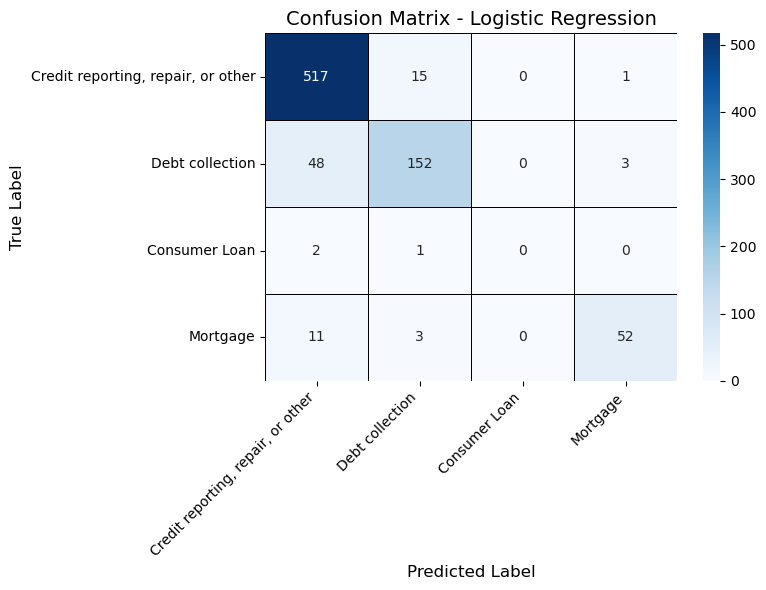

In [16]:
best_model = LogisticRegression(max_iter=1000)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
labels = list(target_categories.keys())
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels,
            cbar=True, linewidths=0.5, linecolor='black')

plt.title("Confusion Matrix - Logistic Regression", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

In [17]:
def predict_complaint(text):
    clean = preprocess(text)
    vector = vectorizer.transform([clean])
    pred = best_model.predict(vector)[0]
    reverse_map = {v: k for k, v in target_categories.items()}
    return reverse_map[pred]

In [18]:
user_input = input("Enter a consumer complaint: ")
predicted = predict_complaint(user_input)

print("\nComplaint:", user_input)
print("Predicted Category:", predicted)

Enter a consumer complaint:  house loan problem



Complaint: house loan problem
Predicted Category: Mortgage


In [20]:
user_input = input("Enter a consumer complaint: ")
predicted = predict_complaint(user_input)

print("\nComplaint:", user_input)
print("Predicted Category:", predicted)

Enter a consumer complaint:  Equifax exposed my personal information without my consent, as part of their recent data breach. \ In addition, they dragged their feet in the announcement of the report, and even allowed their upper management to sell \ off stock before the announcement.



Complaint: Equifax exposed my personal information without my consent, as part of their recent data breach. \ In addition, they dragged their feet in the announcement of the report, and even allowed their upper management to sell \ off stock before the announcement.
Predicted Category: Credit reporting, repair, or other


In [22]:
user_input = input("Enter a consumer complaint: ")
predicted = predict_complaint(user_input)

print("\nComplaint:", user_input)
print("Predicted Category:", predicted)

Enter a consumer complaint:  A debt collection agency has been contacting my family members and disclosing my private financial information, which is extremely distressing and unprofessional.



Complaint: A debt collection agency has been contacting my family members and disclosing my private financial information, which is extremely distressing and unprofessional.
Predicted Category: Debt collection
